In [4]:
import numpy as np

In [6]:
np.concatenate([[1, 2, 3], [4]])

array([1, 2, 3, 4])

In [1]:
from ids_utils import *
from ids_agents import *
from ts_agents import *
from collections import Counter

In [2]:
n = 10
k = 2

In [3]:
agentids = EpochSamplingIDS(n=n, k=k, info_type='IDS', n_samples=100, correlated_sampling=False)
agentts = EpochSamplingTS(n=n, k=k, horizon=100, correlated_sampling=True)

TypeError: __init__() missing 2 required positional arguments: 'limited_prefs' and 'action_type'

In [20]:
from scipy.stats import norm, beta

In [21]:
import numpy as np

In [22]:
import matplotlib.pyplot as plt

In [23]:
t = np.linspace(0., 1., num=100)

In [38]:
alph = 1e5
bet = 1e5

In [39]:
values_beta = 1 / beta.rvs(a=alph, b=bet, size=1000) - 1

(array([  2.,  16.,  82., 135., 227., 277., 169.,  76.,  14.,   2.]),
 array([0.98433751, 0.9873905 , 0.99044349, 0.99349648, 0.99654947,
        0.99960246, 1.00265545, 1.00570844, 1.00876143, 1.01181442,
        1.01486741]),
 <a list of 10 Patch objects>)

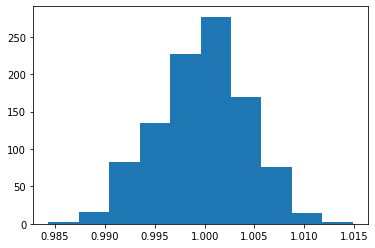

In [40]:
plt.hist(values_beta)

In [41]:
mu = bet / alph
sig = mu * (mu + 1) / alph

In [42]:
sig

2e-05

In [43]:
vals = norm.pdf(t, mu, sig)

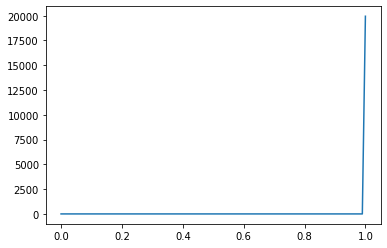

In [44]:
plt.plot(t, vals)


In [12]:
mu2 = 0.5
sig2 = np.sqrt(0.5 * 1.5 / 0.1)

In [13]:
vals2 = norm.pdf(t, mu2, sig2)

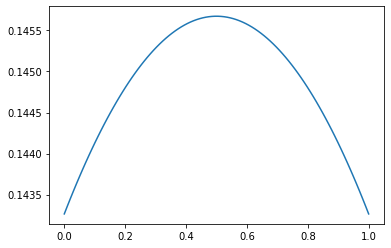

In [14]:
plt.plot(t, vals2)

In [15]:
posterior_parameters = [(alph, bet)] + [(4, 2) for _ in range(n-1)]

In [16]:
agentts.posterior_parameters = posterior_parameters
agentids.posterior_parameters = posterior_parameters

In [17]:
agentts.posterior_parameters

[(100, 99.99),
 (4, 2),
 (4, 2),
 (4, 2),
 (4, 2),
 (4, 2),
 (4, 2),
 (4, 2),
 (4, 2),
 (4, 2)]

In [26]:
agentts.sample_from_posterior(1000).std(0), agentts.sample_from_posterior(1000).mean(0)

(array([0.14009114, 0.72556351, 0.72559475, 0.72558322, 0.72561873,
        0.72561096, 0.72561353, 0.72559693, 0.72553208, 0.72557083]),
 array([1.00864019, 0.65959365, 0.65958033, 0.65956571, 0.6596267 ,
        0.65960871, 0.65965721, 0.65958747, 0.65960831, 0.65959628]))

In [20]:
actions = [agentts.proposal() for _ in range(10000)]
counts = []
for action in actions:
    counts.append(action[0])
    counts.append(action[1])
counts = Counter(counts)
counts

Counter({0: 7188,
         4: 1396,
         8: 1424,
         5: 1462,
         3: 1439,
         7: 1388,
         2: 1424,
         9: 1403,
         6: 1425,
         1: 1451})

In [25]:
agentids.sample_from_posterior(10000).std(0), agentids.sample_from_posterior(10000).mean(0)

(array([0.14412901, 0.78487917, 0.73359093, 0.81475739, 0.7237421 ,
        0.73126976, 0.70982657, 0.74831954, 0.74838685, 0.71979774]),
 array([1.01207681, 0.66216063, 0.66731796, 0.67579589, 0.66775455,
        0.65549735, 0.67085521, 0.67270838, 0.66544113, 0.66827004]))

In [24]:
actions = [agentids.proposal() for _ in range(50)]
counts = []
for action in actions:
    counts.append(action[0])
    counts.append(action[1])
counts = Counter(counts)
counts

min information ratio obtained is 0.3298
with deltas: ['0.13232', '0.13232']
and information gains: ['0.05309', '0.05309']
And rho = 0.041666666666666664
with total no info gain share = 0.00
with total no delta = 0
min information ratio obtained is 0.3451
with deltas: ['0.14886', '0.13441']
and information gains: ['0.03917', '0.05235']
And rho = 0.0
with total no info gain share = 0.00
with total no delta = 0
min information ratio obtained is 0.2759
with deltas: ['0.25341', '0.12733']
and information gains: ['0.06973', '0.05877']
And rho = 0.0
with total no info gain share = 0.00
with total no delta = 0
min information ratio obtained is 0.3537
with deltas: ['0.13947', '0.13947']
and information gains: ['0.05499', '0.05499']
And rho = 0.4583333333333333
with total no info gain share = 0.00
with total no delta = 0
min information ratio obtained is 0.3554
with deltas: ['0.12502', '0.12502']
and information gains: ['0.04398', '0.04398']
And rho = 0.4583333333333333
with total no info gain 

Counter({0: 50, 7: 4, 5: 5, 3: 8, 9: 4, 8: 5, 1: 10, 6: 7, 2: 4, 4: 3})